In [1]:
%load_ext autoreload
%autoreload 2

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns 

import plotly.graph_objects as go
import plotly.express as px


import src.loading as loading

import src.processing.raw_data_cleaning

In [3]:
data = loading.load_data()

== Load Data: start ==
== Load Data: end ==


In [4]:
data

,word_pair,rated_similarity,abs_liking_diference,word1_liking,word2_liking,word1_experience,word2_experience,depression,depressionCont,female,age,participant,senenceBERT_mpnet_similarity,senenceBERT_miniLM_similarity,sense2vec_similarity,gptLarge_similarity,word1,word2
0,Art gallery. Autobiography book.,NaN,0,21,21,6,8,0,12,1,29,1,0.375817,0.275882,0.337977,0.671500,Art gallery,Autobiography book
1,Art gallery. Baking cookies.,NaN,59,21,80,6,14,0,12,1,29,1,0.246449,0.146930,0.209372,0.593072,Art gallery,Baking cookies
2,Art gallery. Board games.,NaN,57,21,78,6,94,0,12,1,29,1,0.347372,0.224889,0.227290,0.726036,Art gallery,Board games
3,Art gallery. Book club.,52.0,38,21,59,6,0,0,12,1,29,1,0.390099,0.335998,0.307647,0.792389,Art gallery,Book club
4,Art gallery. Bread making.,NaN,54,21,75,6,16,0,12,1,29,1,0.270840,0.197813,0.225336,0.623973,Art gallery,Bread making
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198235,Trivia night. Walk in the park.,4.0,4,74,78,49,70,0,6,0,39,112,0.253530,0.180168,0.430666,0.623264,Trivia night,Walk in the park
198236,Trivia night. YouTube videos.,NaN,26,74,100,49,100,0,6,0,39,112,0.173082,0.221341,0.282922,0.728845,Trivia night,YouTube videos
198237,True crime TV series. Walk in the park.,NaN,6,72,78,29,70,0,6,0,39,112,0.044724,0.093903,0.243518,0.509239,True crime TV series,Walk in the park
198238,True crime TV series. YouTube videos.,NaN,28,72,100,29,100,0,6,0,39,112,0.230140,0.126802,0.270472,0.630858,True crime TV series,YouTube videos


In [63]:
node_table = src.processing.raw_data_cleaning.build_node_table(data,["liking","experience"],["participant"])


fig = go.Figure(data=[go.Histogram(x=node_table["experience"]>0)])
fig.show()

/home/julien-rsbrg/Documents/UCL/SemanticToLiking/src/processing/raw_data_cleaning.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/julien-rsbrg/Documents/UCL/SemanticToLiking/src/processing/raw_data_cleaning.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
node_table

,participant,word,liking,experience
0,1,Art gallery,21,6
1,1,Autobiography book,21,8
2,1,Baking cookies,80,14
3,1,Board games,78,94
4,1,Book club,59,0
...,...,...,...,...
6715,108,YouTube videos,27,88
6716,109,YouTube videos,99,98
6717,110,YouTube videos,88,82
6718,111,YouTube videos,73,98


,participant,word,liking,experience,is_experienced
0,1,Art gallery,21,6,False
1,1,Autobiography book,21,8,False
2,1,Baking cookies,80,14,False
3,1,Board games,78,94,True
4,1,Book club,59,0,False
...,...,...,...,...,...
6715,108,YouTube videos,27,88,True
6716,109,YouTube videos,99,98,True
6717,110,YouTube videos,88,82,True
6718,111,YouTube videos,73,98,True


In [66]:
node_table["is_experienced"] = node_table["experience"] > 50

n_experienced_per_participant = node_table.groupby("participant")["is_experienced"].sum()
n_experienced_per_participant = n_experienced_per_participant.rename("n_experienced")

fig = go.Figure(data=[go.Histogram(x=n_experienced_per_participant)])
fig.show()

In [76]:
demo_data = data[["participant","depressionCont"]].drop_duplicates()
demo_data.index = demo_data["participant"]
demo_data = demo_data.drop("participant",axis=1)
demo_data

,depressionCont
participant,
1,12
2,0
3,13
4,31
5,5
...,...
108,36
109,13
110,2


In [ ]:
exp_data = pd.read_csv("src/experiments/results/model_pipeline_content-liking_edge-sim_epochs-10000.csv")
exp_data = pd.merge(n_experienced_per_participant,exp_data,on="participant")
exp_data = pd.merge(demo_data,exp_data,on="participant")
exp_data

,participant,depressionCont,n_experienced,min_train_loss,min_train_mae,min_train_loss_epoch,min_train_mae_epoch,end_epoch,init_src_content_0,trained_src_content_0,...,init_full_dst_edge_0,trained_full_dst_edge_0,init_att_edge_0,trained_att_edge_0,init_edge_0,trained_edge_0,init_full_edge_0,trained_full_edge_0,init_bias_0,trained_bias_0
0,1,12,19,0.000136,0.009796,7125,7125,7126,-0.857654,-38.785465,...,NaN,NaN,1.0,1.0,0.590777,-0.026866,0.590777,-0.026866,NaN,NaN
1,2,0,27,0.058280,0.197277,9028,9032,9072,1.366187,-12.148845,...,NaN,NaN,1.0,1.0,-1.188447,0.000755,-1.188447,0.000755,NaN,NaN
2,3,13,29,0.127559,0.299875,9074,9074,9075,0.691759,-8.724916,...,NaN,NaN,1.0,1.0,0.160159,0.693813,0.160159,0.693813,NaN,NaN
3,4,31,11,0.095093,0.283958,9999,9999,10000,0.640917,-55.615639,...,NaN,NaN,1.0,1.0,1.392629,-0.025222,1.392629,-0.025222,NaN,NaN
4,5,5,19,0.392760,0.579089,9999,9999,10000,-1.215786,-62.949337,...,NaN,NaN,1.0,1.0,-1.181367,-0.003618,-1.181367,-0.003618,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,108,36,35,0.175769,0.392551,8550,5256,8552,-0.915517,-53.606503,...,NaN,NaN,1.0,1.0,0.395216,-0.122347,0.395216,-0.122347,NaN,NaN
108,109,13,26,0.009161,0.075194,8953,8677,8954,-0.826077,-41.168011,...,NaN,NaN,1.0,1.0,-1.084688,-1.084688,-1.084688,-1.084688,NaN,NaN
109,110,2,29,0.444538,0.545480,5277,5278,5279,0.685681,0.803914,...,NaN,NaN,1.0,1.0,0.792971,18.176163,0.792971,18.176163,NaN,NaN
110,111,15,20,0.002041,0.039287,8978,8978,8979,-1.233339,-43.399826,...,NaN,NaN,1.0,1.0,-1.268683,-1.992061,-1.268683,-1.992061,NaN,NaN


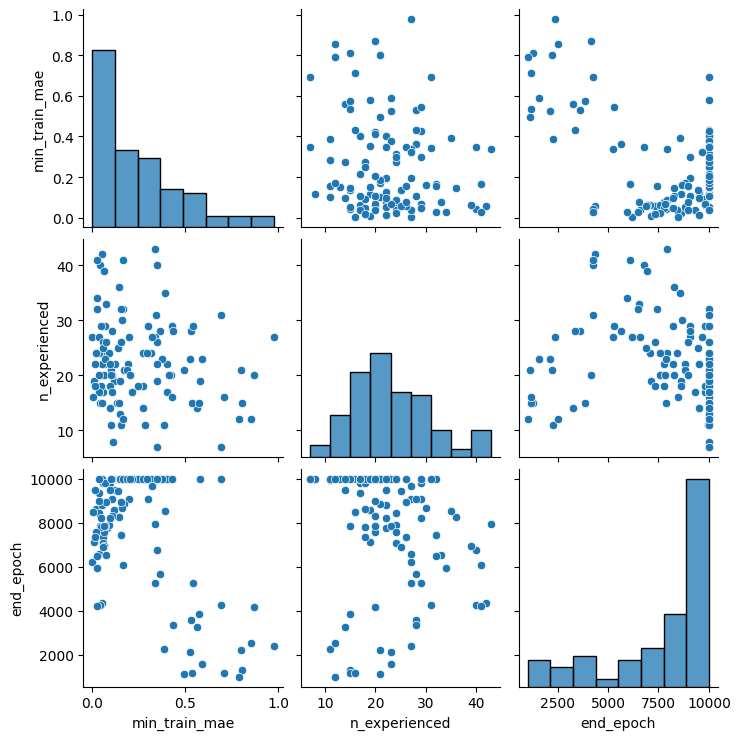

In [50]:
sns.pairplot(exp_data[['min_train_mae','n_experienced', 'end_epoch']])

In [59]:
np.corrcoef(exp_data[['min_train_mae','n_experienced',"end_epoch"]].values.T)

array([[ 1.        , -0.1585926 , -0.52766928],
       [-0.1585926 ,  1.        , -0.15855042],
       [-0.52766928, -0.15855042,  1.        ]])

In [60]:
import statsmodels.formula.api as smf

results = smf.ols('min_train_mae ~ 1 + n_experienced + end_epoch', data=exp_data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          min_train_mae   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     27.91
Date:                Fri, 14 Mar 2025   Prob (F-statistic):           1.64e-10
Time:                        12:19:13   Log-Likelihood:                 29.712
No. Observations:                 112   AIC:                            -53.42
Df Residuals:                     109   BIC:                            -45.27
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.7861      0.081      9.702

In [80]:
fig = go.Figure(data=[go.Histogram(x=exp_data["min_train_mae"])])
fig.show()

In [83]:
exp_data.columns

Index(['participant', 'depressionCont', 'n_experienced', 'min_train_loss',
       'min_train_mae', 'min_train_loss_epoch', 'min_train_mae_epoch',
       'end_epoch', 'init_src_content_0', 'trained_src_content_0',
       'init_src_content_1', 'trained_src_content_1', 'init_att_src_edge_0',
       'trained_att_src_edge_0', 'init_src_edge_0', 'trained_src_edge_0',
       'init_full_src_edge_0', 'trained_full_src_edge_0', 'init_dst_content_0',
       'trained_dst_content_0', 'init_att_dst_edge_0',
       'trained_att_dst_edge_0', 'init_dst_edge_0', 'trained_dst_edge_0',
       'init_full_dst_edge_0', 'trained_full_dst_edge_0', 'init_att_edge_0',
       'trained_att_edge_0', 'init_edge_0', 'trained_edge_0',
       'init_full_edge_0', 'trained_full_edge_0', 'init_bias_0',
       'trained_bias_0'],
      dtype='object')

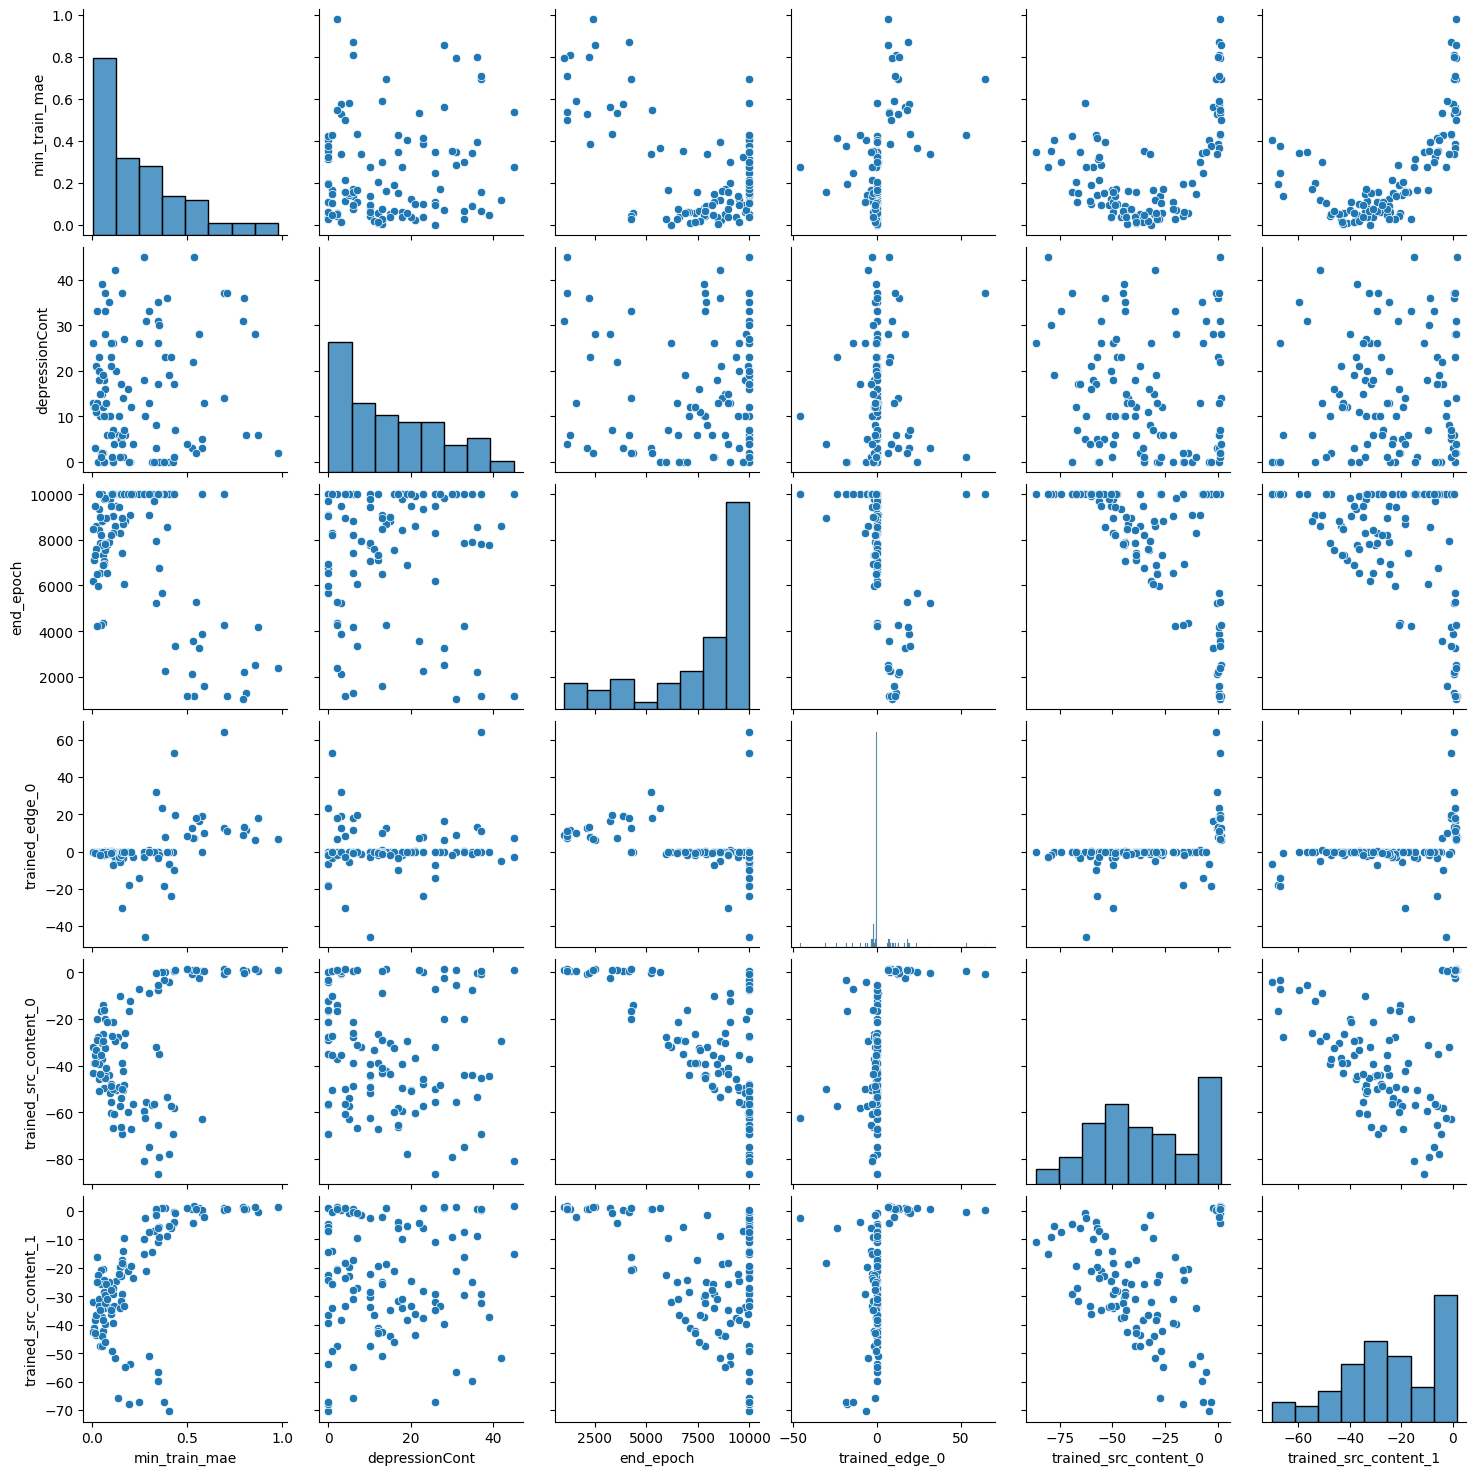

In [85]:
sns.pairplot(exp_data[['min_train_mae','depressionCont', 'end_epoch',"trained_edge_0","trained_src_content_0","trained_src_content_1"]])

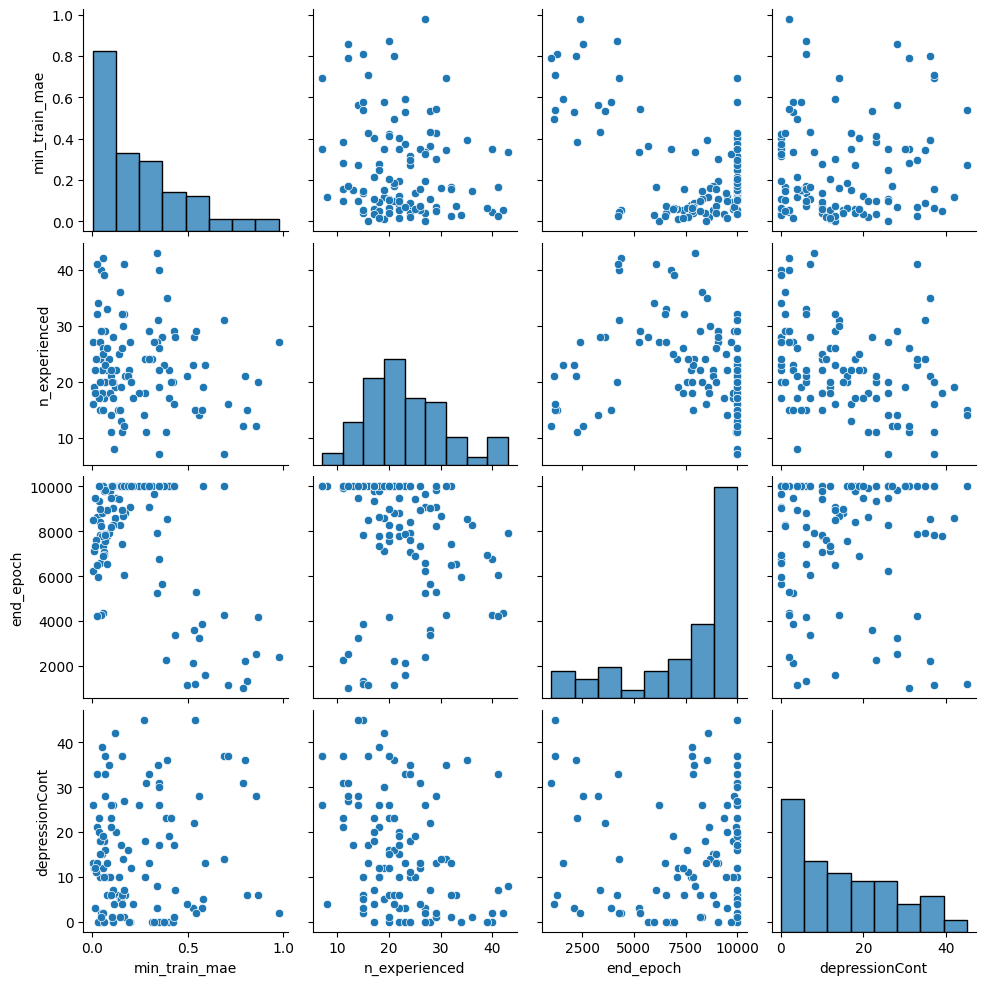

In [82]:
sns.pairplot(exp_data[['min_train_mae','n_experienced', 'end_epoch',"depressionCont"]])

In [61]:
fig = px.parallel_coordinates(exp_data, color="min_train_mae",
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()

# 03-14

In [86]:
exp_data = pd.read_csv("src/experiments/results/03-14_model_pipeline_content-liking_edge-sim_epochs-10000.csv")
exp_data = pd.merge(n_experienced_per_participant,exp_data,on="participant")
exp_data = pd.merge(demo_data,exp_data,on="participant")
exp_data

,participant,depressionCont,n_experienced,min_train_loss,min_train_mae,min_train_loss_epoch,min_train_mae_epoch,end_epoch,init_src_content_0,trained_src_content_0,...,init_full_dst_edge_0,trained_full_dst_edge_0,init_att_edge_0,trained_att_edge_0,init_edge_0,trained_edge_0,init_full_edge_0,trained_full_edge_0,init_bias_0,trained_bias_0
0,1,12,19,0.736099,0.757215,445,496,497,0.817901,0.075396,...,NaN,NaN,1.0,1.0,-1.027797,-0.000781,-1.027797,-0.000781,NaN,NaN
1,2,0,27,1.197700,0.909237,9999,9999,10000,0.171442,0.656362,...,NaN,NaN,1.0,1.0,-1.592284,-101.970695,-1.592284,-101.970695,NaN,NaN
2,3,13,29,0.593790,0.656100,1436,1442,1443,-1.279186,0.584123,...,NaN,NaN,1.0,1.0,-0.067477,-0.012981,-0.067477,-0.012981,NaN,NaN
3,4,31,11,0.838266,0.784769,9999,9999,10000,0.589193,1.224540,...,NaN,NaN,1.0,1.0,-0.813451,-119.587402,-0.813451,-119.587402,NaN,NaN
4,5,5,19,0.494123,0.632496,2035,2038,2039,1.194863,-0.319208,...,NaN,NaN,1.0,1.0,0.498171,0.821421,0.498171,0.821421,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,108,36,35,0.502125,0.563715,2444,1736,2447,-1.245021,-0.187980,...,NaN,NaN,1.0,1.0,0.498305,11.694692,0.498305,11.694692,NaN,NaN
108,109,13,26,0.400697,0.535026,3219,3219,3220,-1.228042,0.356409,...,NaN,NaN,1.0,1.0,0.390429,17.223112,0.390429,17.223112,NaN,NaN
109,110,2,29,0.624754,0.678075,9999,9999,10000,-0.768319,-0.348132,...,NaN,NaN,1.0,1.0,-1.554192,-115.008858,-1.554192,-115.008858,NaN,NaN
110,111,15,20,0.978888,0.843446,9999,9999,10000,-0.086648,0.280162,...,NaN,NaN,1.0,1.0,-0.739492,72.816002,-0.739492,72.816002,NaN,NaN


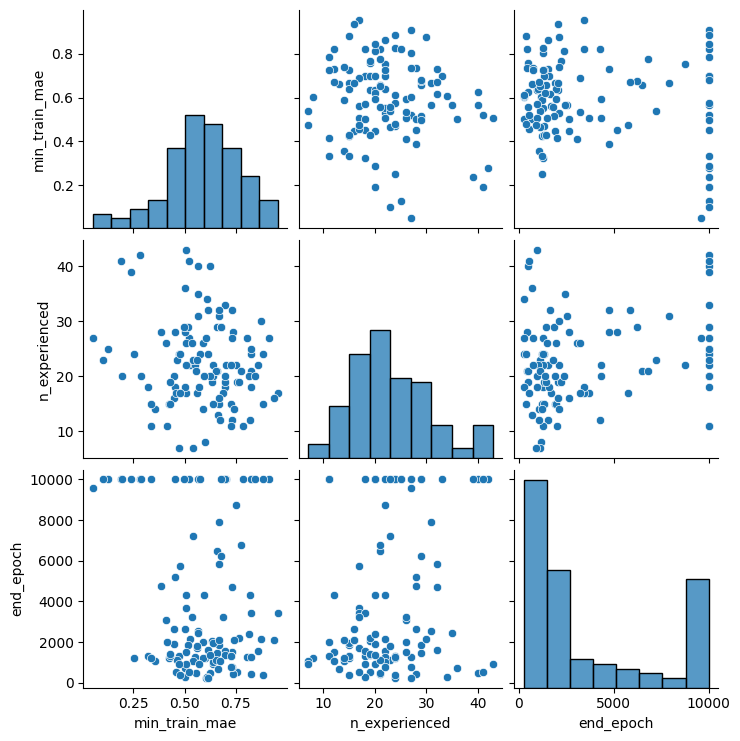

In [87]:
sns.pairplot(exp_data[['min_train_mae','n_experienced', 'end_epoch']])

In [88]:
np.corrcoef(exp_data[['min_train_mae','n_experienced',"end_epoch"]].values.T)

array([[ 1.        , -0.15311813, -0.18522256],
       [-0.15311813,  1.        ,  0.2394296 ],
       [-0.18522256,  0.2394296 ,  1.        ]])

In [89]:
import statsmodels.formula.api as smf

results = smf.ols('min_train_mae ~ 1 + n_experienced + end_epoch', data=exp_data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          min_train_mae   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     2.679
Date:                Fri, 14 Mar 2025   Prob (F-statistic):             0.0731
Time:                        14:00:52   Log-Likelihood:                 34.061
No. Observations:                 112   AIC:                            -62.12
Df Residuals:                     109   BIC:                            -53.97
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.6778      0.053     12.843

In [90]:
fig = go.Figure(data=[go.Histogram(x=exp_data["min_train_mae"])])
fig.show()

In [91]:
exp_data.columns

Index(['participant', 'depressionCont', 'n_experienced', 'min_train_loss',
       'min_train_mae', 'min_train_loss_epoch', 'min_train_mae_epoch',
       'end_epoch', 'init_src_content_0', 'trained_src_content_0',
       'init_src_content_1', 'trained_src_content_1', 'init_att_src_edge_0',
       'trained_att_src_edge_0', 'init_src_edge_0', 'trained_src_edge_0',
       'init_full_src_edge_0', 'trained_full_src_edge_0', 'init_dst_content_0',
       'trained_dst_content_0', 'init_att_dst_edge_0',
       'trained_att_dst_edge_0', 'init_dst_edge_0', 'trained_dst_edge_0',
       'init_full_dst_edge_0', 'trained_full_dst_edge_0', 'init_att_edge_0',
       'trained_att_edge_0', 'init_edge_0', 'trained_edge_0',
       'init_full_edge_0', 'trained_full_edge_0', 'init_bias_0',
       'trained_bias_0'],
      dtype='object')

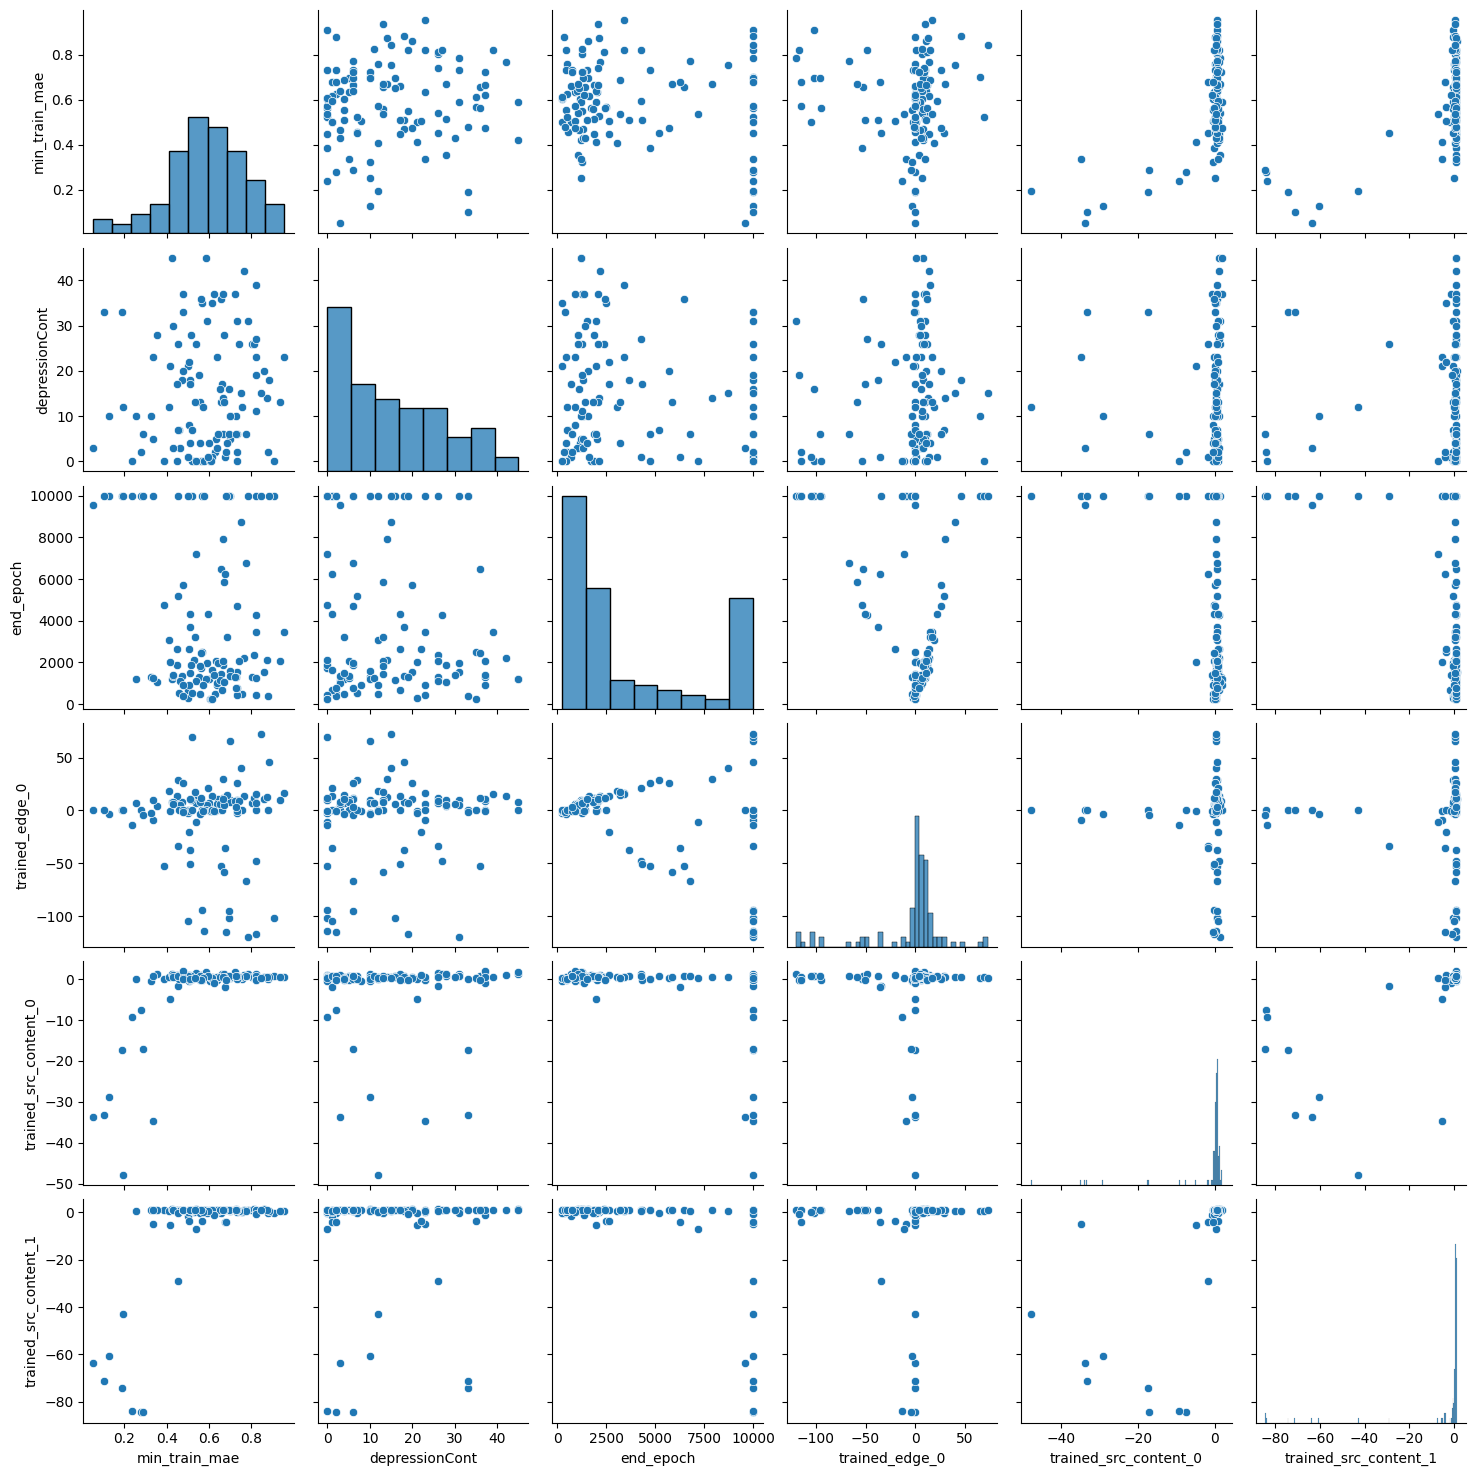

In [92]:
sns.pairplot(exp_data[['min_train_mae','depressionCont', 'end_epoch',"trained_edge_0","trained_src_content_0","trained_src_content_1"]])

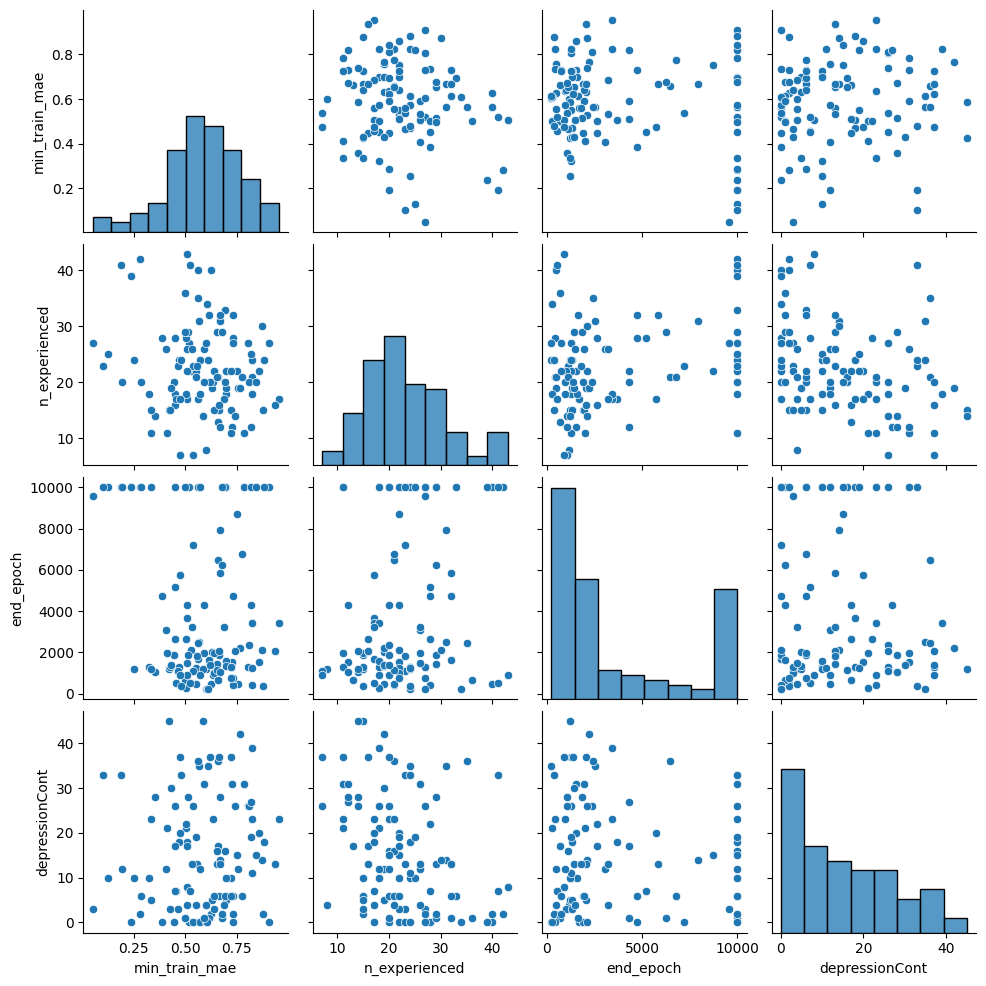

In [93]:
sns.pairplot(exp_data[['min_train_mae','n_experienced', 'end_epoch',"depressionCont"]])

In [94]:
fig = px.parallel_coordinates(exp_data, color="min_train_mae",
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()